# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w~puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}

\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}

\begin{equation}
A_xy = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [27]:
from ainvert import A_1
import numpy as np
import matplotlib.pyplot as plt
import cv2
A_1 = np.array(A_1)
plt.gray()
#print(A_1)

<Figure size 640x480 with 0 Axes>

C:\Users\janro\AppData\Local\Temp\ipykernel_18232\3323871794.py:11: RuntimeWarning: overflow encountered in scalar add
  Axy = (I[i+1, j+1] - I[i-1, j] - I[i, j-1] + I[i, j])/4
C:\Users\janro\AppData\Local\Temp\ipykernel_18232\3323871794.py:16: RuntimeWarning: overflow encountered in scalar subtract
  Bxy = (I[i+1, j+1] - I[i-1, j] - I[i, j-1] + I[i, j])/4
C:\Users\janro\AppData\Local\Temp\ipykernel_18232\3323871794.py:21: RuntimeWarning: overflow encountered in scalar add
  Cxy = (I[i+1, j+1] - I[i-1, j] - I[i, j-1] + I[i, j])/4
C:\Users\janro\AppData\Local\Temp\ipykernel_18232\3323871794.py:28: RuntimeWarning: overflow encountered in scalar subtract
  Dxy = (I[i+1, j+1] - I[i-1, j] - I[i, j-1] + I[i, j])/4
C:\Users\janro\AppData\Local\Temp\ipykernel_18232\3323871794.py:11: RuntimeWarning: overflow encountered in scalar subtract
  Axy = (I[i+1, j+1] - I[i-1, j] - I[i, j-1] + I[i, j])/4
C:\Users\janro\AppData\Local\Temp\ipykernel_18232\3323871794.py:16: RuntimeWarning: overflow encount

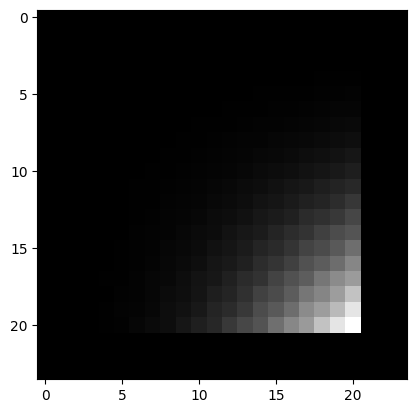

In [45]:
def bicubic_int(I: cv2.Mat, scalex: float, scaley: float):
    newimgshape = (int(I.shape[0] * scaley), int(I.shape[1]*scalex))
    newimg = np.ndarray(newimgshape)
    for y in range(newimgshape[0]):
        for x in range(newimgshape[1]):
            i, j = int(y/scaley), int(x/scalex)
            if 1 < y < newimg.shape[0] - 3 and 1 < x < newimg.shape[1] - 3:
                A = I[i, j]
                Ax = (I[i+1, j] - I[i-1, j])/2
                Ay = (I[i, j+1] - I[i, j-1])/2
                Axy = ((I[i+1, j+1] - I[i-1, j]) - I[i, j-1] + I[i, j])/4
                i, j = i, j+1
                B = I[i, j]
                Bx = (I[i+1, j] - I[i-1, j])/2
                By = (I[i, j+1] - I[i, j-1])/2
                Bxy = (I[i+1, j+1] - I[i-1, j] - I[i, j-1] + I[i, j])/4
                i, j = i + 1, j
                C = I[i, j]
                Cx = (I[i+1, j] - I[i-1, j])/2
                Cy = (I[i, j+1] - I[i, j-1])/2
                Cxy = (I[i+1, j+1] - I[i-1, j] - I[i, j-1] + I[i, j])/4
                if Cxy < 0:
                    print(Cxy)
                i, j = i, j-1
                D = I[i, j]
                Dx = (I[i+1, j] - I[i-1, j])/2
                Dy = (I[i, j+1] - I[i, j-1])/2
                Dxy = (I[i+1, j+1] - I[i-1, j] - I[i, j-1] + I[i, j])/4

                x_vec = np.array([A, B, C, D, Ax, Bx, Cx, Dx, Ay, By, Cy, Dy, Axy, Bxy, Cxy, Dxy]).T
                a = A_1@x_vec
                sum = 0
                for k in range(4):
                    for l in range(4):
                        sum += a[4*l + k]*(x**k)*(y**l)
                newimg[y, x] = sum

    return newimg

parrot = cv2.imread('parrot.bmp', cv2.IMREAD_GRAYSCALE)
chessboard = cv2.imread('chessboard.bmp', cv2.IMREAD_GRAYSCALE)
new = bicubic_int(chessboard, 1.5, 1.5)
chessboard = parrot
#new = cv2.resize(chessboard, dsize=(int(chessboard.shape[0]*1.5), int(chessboard.shape[1]*1.5)), interpolation=cv2.INTER_CUBIC)
plt.imshow(new)
